<a href="https://colab.research.google.com/github/Navya-HRN/Placement_prediction/blob/main/Placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**

In [2]:
job=pd.read_csv("/content/Job_Placement_Data (1).csv")

In [3]:
job.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
job.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [6]:
job.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [8]:
X=job.drop(['status'],axis=1)

In [9]:
y=job['status']

In [12]:
X.shape,y.shape

((215, 12), (215,))

## **Converting float datatype into int**

In [14]:
X[['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage','mba_percent']]=X[['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage','mba_percent']].round(0).astype('int')

## **Encoding categorical variables**

In [16]:
X=pd.get_dummies(X,drop_first=True)

In [18]:
y=pd.get_dummies(y,drop_first=True)

## **Splitting into training and testing dataset**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

## **Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [21]:
X_train=ss.fit_transform(X_train)

In [22]:
X_test=ss.transform(X_test)

## **Data visualization**

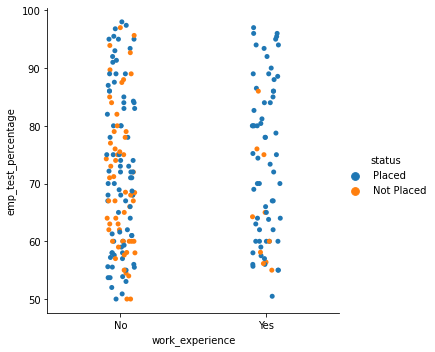

In [24]:
sns.catplot(data=job,hue='status',y='emp_test_percentage',x='work_experience')

## **Training the model**

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [44]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## **Testing the model**

In [47]:
y_pred=lr.predict(X_test)

## **Model Evaluation**

In [31]:
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test,y_pred))

0.8923076923076924
